## ปฏิบัติการที่ 2.1 (5 คะแนน) นักศึกษาสามารถใช้งานคำสั่ง SQL ได้
ให้ติดตั้งไลบรารี่ต่อไปนี้


> ! pip install pymysql


เพื่อให้ Python สามารถเชื่อมต่อกับฐานข้อมูล MySQL ได้

In [1]:
! pip install pymysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.4 MB/s 


จากนั้นให้กำหนดค่าที่ใช้ config สำหรับเชื่อมต่อ database 



> ข้อควรระวังในการทำงานจริงเกี่ยวกับ Credential 
1. ห้ามเขียนค่าที่ใช้ในการ config ลงมาในชุดคำสั่งตรง ๆ เช่น IP ของ Host หรือ Password
2. ควรทำเป็น .env หรือ config file ที่เหมาะสม
3. ห้ามทำเป็น Note หรือ .env แล้ว Commit ลง Git หรือเผยแพร่บนอินเตอร์เน็ต
4. หากมีการใช้งาน Cloud ควรใช้ระบบ Secret Management

Relation Model ของฐานข้อมูลนี้

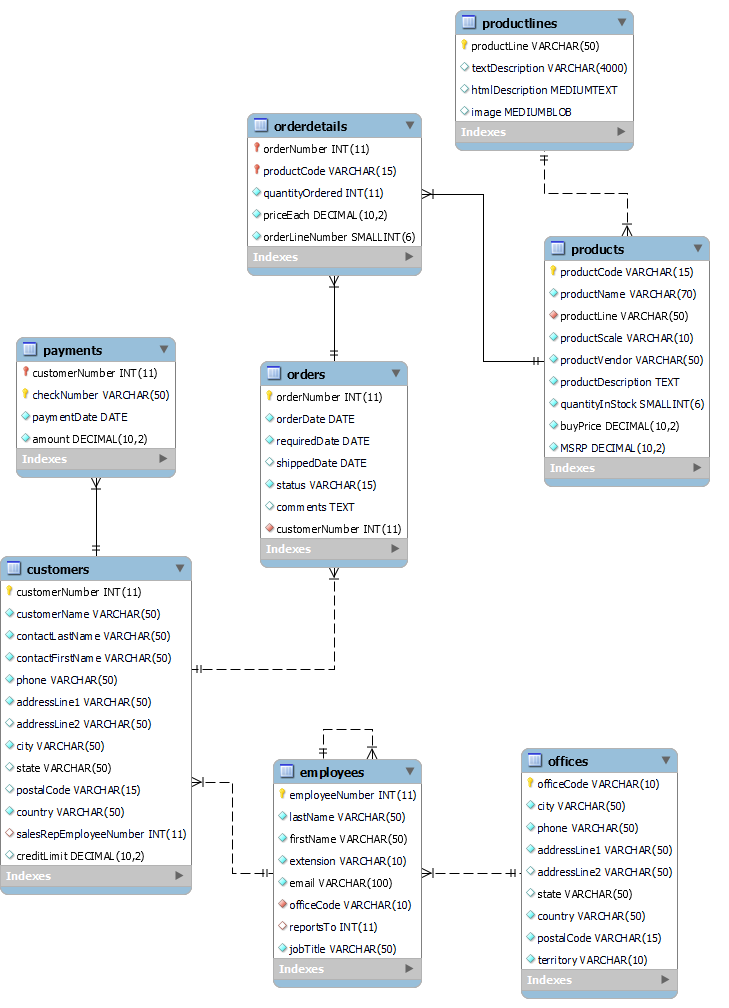

In [27]:
class DBconfig:
  MYSQL_HOST = 'remotemysql.com'
  MYSQL_PORT = 3306
  MYSQL_USER = 'MQg1idDODQ'
  MYSQL_PASSWORD = 'teJaANMGDl'
  MYSQL_DB = 'MQg1idDODQ'

In [28]:
print(DBconfig.MYSQL_PORT)

3306


สร้าง Database Connection 

In [57]:
import pymysql

connection = pymysql.connect(host=DBconfig.MYSQL_HOST,
                             port=DBconfig.MYSQL_PORT,
                             user=DBconfig.MYSQL_USER,
                             password=DBconfig.MYSQL_PASSWORD,
                             db=DBconfig.MYSQL_DB,
                             cursorclass=pymysql.cursors.DictCursor)

In [12]:
connection

เขียนคำสั่งแสดงรายการตารางที่มีในฐานข้อมูล

In [13]:
with connection.cursor() as cs:
  cs.execute("show tables;")
  tables = cs.fetchall()

for x in tables:
  print(x)

{'Tables_in_MQg1idDODQ': 'country'}
{'Tables_in_MQg1idDODQ': 'currency'}
{'Tables_in_MQg1idDODQ': 'customers'}
{'Tables_in_MQg1idDODQ': 'employees'}
{'Tables_in_MQg1idDODQ': 'exchange_rate_to_thb'}
{'Tables_in_MQg1idDODQ': 'offices'}
{'Tables_in_MQg1idDODQ': 'orderdetails'}
{'Tables_in_MQg1idDODQ': 'orders'}
{'Tables_in_MQg1idDODQ': 'payments'}
{'Tables_in_MQg1idDODQ': 'product'}
{'Tables_in_MQg1idDODQ': 'productlines'}
{'Tables_in_MQg1idDODQ': 'products'}


### 1. (1 คะแนน) จงเขียนโปรแกรมภาษาไพธอน ในการแสดงข้อมูลจากตาราง customers โดยแสดงข้อมูลทุก Column และเลือกเฉพาะข้อมูลที่อยู่ในประเทศ (country) คือ UK




In [14]:
with connection.cursor() as cs:
  cs.execute("SELECT customerNumber,customerName,country  FROM customers WHERE country = 'UK';")
  res1 = cs.fetchall()

for x in res1:
  print(x)

{'customerNumber': 187, 'customerName': 'AV Stores, Co.', 'country': 'UK'}
{'customerNumber': 201, 'customerName': 'UK Collectables, Ltd.', 'country': 'UK'}
{'customerNumber': 240, 'customerName': 'giftsbymail.co.uk', 'country': 'UK'}
{'customerNumber': 324, 'customerName': 'Stylish Desk Decors, Co.', 'country': 'UK'}
{'customerNumber': 489, 'customerName': 'Double Decker Gift Stores, Ltd', 'country': 'UK'}


### 2. (1 คะแนน) จงเขียนโปรแกรมภาษาไพธอน หาว่า productLine แต่ละตัวในตาราง products มีผลรวม quantityInStock เท่าไร โดยในเรียงลำดับจากมากไปน้อยที่ quantityInStock

In [26]:
with connection.cursor() as cs:
  cs.execute("SELECT productLine, sum(quantityInStock) AS TotalQuantity FROM products GROUP BY productLine ORDER BY TotalQuantity DESC;")
  res2 = cs.fetchall()

for x in res2:
  print(x)

InterfaceError: ignored

### 3. (1 คะแนน) จงเขียนโปรแกรมภาษาไพธอน แสดงเฉพาะคอลัม productName, productVendor, ผลการคำนวณจาก priceEach และ quantityOrdered และ orderDate ซึ่งนักศึกษาต้องทำการ Join ตาราง 3 ตาราง คือ orders, orderdetails, products เพื่อหาว่า productName แต่ละตัวที่มี productVendor เป็น Exoto Designs มียอดขายจากการสั่งซื้อเท่าไร (สามารถหาได้จากตาราง orderdetails คำนวณจาก priceEach และ quantityOrdered) โดยแสดงเฉพาะการสั่งซื้อที่มี orderDate อยู่ระหว่างเดือนกุมภาพันธ์ ปี 2003 เท่านั้นและเรียงข้อมูลตาม orderDate จากน้อยไปมาก 

In [30]:
with connection.cursor() as cs:
  cs.execute("SELECT productName, productVendor, priceEach*quantityOrdered AS 'Product income',orderDate  FROM orders INNER JOIN orderdetails INNER JOIN products ON products.productCode = orderdetails.productCode AND orderdetails.orderNumber = orders.orderNumber WHERE products.productVendor = 'Exoto Designs' AND orders.orderDate BETWEEN '2003-02-01' AND '2003-02-29' ORDER BY orders.orderDate;")
  res3 = cs.fetchall()

for x in res3:
  print(x)

{'productName': '1904 Buick Runabout', 'productVendor': 'Exoto Designs', 'Product income': Decimal('3094.68'), 'orderDate': datetime.date(2003, 2, 11)}
{'productName': '1941 Chevrolet Special Deluxe Cabriolet', 'productVendor': 'Exoto Designs', 'Product income': Decimal('3863.02'), 'orderDate': datetime.date(2003, 2, 17)}
{'productName': '1997 BMW F650 ST', 'productVendor': 'Exoto Designs', 'Product income': Decimal('1778.00'), 'orderDate': datetime.date(2003, 2, 24)}


### 4. (1 คะแนน) จงเขียนโปรแกรมภาษาไพธอน โดยทำการ Join 2 ตารางคือ payments และ customers และหาว่ามีลูกค้าจำนวนกี่คนที่มีการจ่ายเงิน (amount) สูงกว่าค่าเฉลี่ยของการใช้จ่ายทั้งหมด (แนะนำว่าให้มีการใช้ Subquery ร่วมด้วย)

In [17]:
with connection.cursor() as cs:
  cs.execute("SELECT count(*) AS 'TotalNumCustomer' FROM payments INNER JOIN customers ON customers.customerNumber = payments.customerNumber WHERE payments.amount > (SELECT AVG(payments.amount) FROM payments);")
  res4 = cs.fetchall()

for x in res4:
  print(x)

{'TotalNumCustomer': 134}


### 5. (1 คะแนน) จงเขียนโปรแกรมภาษาไพธอน โดยแสดงชื่อพนักงาน 5 คนแรก (firstName, lastName) ที่เรียงลำดับจาก employeeNumber ในตาราง employees มี jobTitle ลงท้ายด้วย Sales  


> สามารถใช้ LIKE (อ่านเพิ่มเติมจาก [ที่นี่](https://www.mysqltutorial.org/mysql-like/))  หรือ REGEXP (อ่านเพิ่มเติมจาก [ที่นี่](https://www.geeksforgeeks.org/mysql-regular-expressions-regexp/)) 



In [18]:
with connection.cursor() as cs:
  cs.execute("SELECT firstName, lastName FROM employees WHERE jobTitle LIKE '%Sales';")
  res5_1 = cs.fetchall()

for x in res5_1:
  print(x)

{'firstName': 'Mary', 'lastName': 'Patterson'}


In [19]:
with connection.cursor() as cs:
  cs.execute("SELECT firstName, lastName FROM employees WHERE jobTitle REGEXP 'Sales$';")
  res5_2 = cs.fetchall()

for x in res5_2:
  print(x)

{'firstName': 'Mary', 'lastName': 'Patterson'}


## ปฏิบัติการที่ 2.2 (5 คะแนน) นักศึกษาสามารถใช้งาน DataFrame ร่วมกับข้อมูลที่ได้จาก SQL ได้

### 6. (1 คะแนน) ทำการเปลี่ยนผลลัพธ์จากข้อ 1 เป็น DataFrame

In [22]:
import pandas as pd
res6_df = pd.DataFrame(res1)
res6_df

,customerNumber,customerName,country
0,187,"AV Stores, Co.",UK
1,201,"UK Collectables, Ltd.",UK
2,240,giftsbymail.co.uk,UK
3,324,"Stylish Desk Decors, Co.",UK
4,489,"Double Decker Gift Stores, Ltd",UK


In [ ]:
type(res6_df)

pandas.core.frame.DataFrame

### 7. ทำการ set_index ให้กับ Data Table ในข้อที่ 6 โดยให้ customerNumber เป็น index

In [23]:
res7_df = res6_df.set_index("customerNumber")
res7_df

,customerName,country
customerNumber,,
187,"AV Stores, Co.",UK
201,"UK Collectables, Ltd.",UK
240,giftsbymail.co.uk,UK
324,"Stylish Desk Decors, Co.",UK
489,"Double Decker Gift Stores, Ltd",UK


### 8. (1 คะแนน) ให้เขียนคำสั่ง SQL ในการค้นหาข้อมูลด้วย Pandas โดยให้แสดงข้อมูลทั้งหมด ทุกคอลัม ในตาราง offices ด้วยคำสั่ง read_sql และทำการ set_index ให้กับ officeCode 


> อ่านการใช้ read_sql เพิ่มเติมได้ [ที่นี่](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html)



In [31]:
sql = "SELECT * FROM offices;"
res8_df = pd.read_sql(sql, connection)
res8_df = res8_df.set_index('officeCode')
res8_df

,city,phone,addressLine1,addressLine2,state,country,postalCode,territory
officeCode,,,,,,,,
1,San Francisco,+1 650 219 4782,100 Market Street,Suite 300,CA,USA,94080,NA
2,Boston,+1 215 837 0825,1550 Court Place,Suite 102,MA,USA,02107,NA
3,NYC,+1 212 555 3000,523 East 53rd Street,apt. 5A,NY,USA,10022,NA
4,Paris,+33 14 723 4404,43 Rue Jouffroy D'abbans,None,None,France,75017,EMEA
5,Tokyo,+81 33 224 5000,4-1 Kioicho,None,Chiyoda-Ku,Japan,102-8578,Japan
6,Sydney,+61 2 9264 2451,5-11 Wentworth Avenue,Floor #2,None,Australia,NSW 2010,APAC
7,London,+44 20 7877 2041,25 Old Broad Street,Level 7,None,UK,EC2N 1HN,EMEA


### 9. (1 คะแนน) ให้เขียนคำสั่ง SQL ในการค้นหาข้อมูลด้วย Pandas โดยให้แสดงข้อมูลว่าลูกค้าที่มีชื่อ (customerName) ว่า Alpha Cognac ได้ทำการสั่งสินค้ารหัส (orderNumber) อะไรบ้าง

In [41]:
sql = "SELECT customers.customerName, orders.orderNumber FROM customers INNER JOIN orders ON customers.customerNumber = orders.customerNumber WHERE customers.customerName = 'Alpha Cognac';"
res9_df = pd.read_sql(sql, connection)
res9_df

,customerName,orderNumber
0,Alpha Cognac,10136
1,Alpha Cognac,10178
2,Alpha Cognac,10397


### 10. (1 คะแนน) จากโจทย์ข้อ 9 ให้ใช้คำสั่ง merge แทนการใช้คำสั่ง Join ของ SQL 
ศึกษาคำสั่ง merge เพิ่มเติมได้[ที่นี่](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)

In [52]:
sql = "SELECT customers.customerNumber, customers.customerName FROM customers WHERE customers.customerName = 'Alpha Cognac';"
res10_1_df = pd.read_sql(sql, connection)
res10_1_df = res10_1_df.set_index('customerNumber')
res10_1_df

,customerName
customerNumber,
242,Alpha Cognac


In [58]:
sql = "SELECT orders.orderNumber, orders.customerNumber  FROM orders;"
res10_2_df = pd.read_sql(sql, connection)
res10_2_df = res10_2_df.set_index('customerNumber')
res10_2_df

,orderNumber
customerNumber,
103,10123
103,10298
103,10345
112,10124
112,10278
...,...
495,10243
496,10138
496,10179


จากนั้นทำการ merge 2 ตัวแปรคือ res10_1_df และ res10_2_df โดยกำหนดให้ ใช้ inner join (ผลลัพธ์ที่ได้จะเหมือนข้อ 9)

In [59]:
res10_3_df = res10_2_df.merge(res10_1_df, how="inner", left_on="customerNumber", right_on="customerNumber")
res10_3_df

,orderNumber,customerName
customerNumber,,
242,10136,Alpha Cognac
242,10178,Alpha Cognac
242,10397,Alpha Cognac


### 11. (1 คะแนน) จากตาราง payments ให้ทำการคำนวณว่า ถ้าแปลง amount จาก USD เป็นเงิน BHT จะได้ค่าเท่าไร ให้เลือกเฉพาะ customerNumber เป็น 103 หรือ 112 โดยให้ทำการเพิ่ม Column ใหม่ใน DataFrame ด้วย (ให้ 1 USD = 30 THB)

In [60]:
sql = "SELECT * FROM payments WHERE customerNumber in (103,112);"
res11_df = pd.read_sql(sql, connection)
res11_df = res11_df.set_index(['customerNumber', 'checkNumber'])
res11_df['THBamount'] = res11_df['amount'] * 30
res11_df

paymentDate    amount  THBamount
customerNumber checkNumber                                 
103            HQ336336     2004-10-19   6066.78   182003.4
               JM555205     2003-06-05  14571.44   437143.2
               OM314933     2004-12-18   1676.14    50284.2
112            BO864823     2004-12-17  14191.12   425733.6
               HQ55022      2003-06-06  32641.98   979259.4
               ND748579     2004-08-20  33347.88  1000436.4

### 12. เปลี่ยน Type ของ THBamount เป็น int โดยใช้คำสั่ง asType และตรวจสอบ Type โดยใช้คำสั่ง dtypes

In [ ]:
res11_df.dtypes

paymentDate     object
amount         float64
THBamount      float64
dtype: object

In [ ]:
res11_df["THBamount"] = res11_df["THBamount"].astype(int)
res11_df.dtypes

paymentDate     object
amount         float64
THBamount        int64
dtype: object

**ให้ศึกษาคำสั่ง [to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html), [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html), [to_csv](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html), [drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) เพิ่มเติม